In [ ]:
from commonfunctions import *
import cv2
import imutils


In [ ]:
def preprocess_image(img):
    gray_img = rgb2gray(img)
    gray_img = (gray_img*255).astype(np.uint8)    
    filtered_img = cv2.bilateralFilter(gray_img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)
    return filtered_img



img = io.imread('imgs/License1.jpg')
show_images([img,rgb2gray(img),preprocess_image(img)],titles=['RGB Image','Gray image','Filtered Image'])

In [ ]:
import cv2

img = io.imread('imgs/0006.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = (gray).astype(np.uint8)
filtered_img = cv2.bilateralFilter(gray_img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)



# Perform thresholding or other preprocessing steps as needed to isolate the plate
# For example, you can use adaptive thresholding
# thresh = cv2.adaptiveThreshold(filtered_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
_, mask = cv2.threshold(filtered_img, 100, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plate = None
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(contour)
    if (aspect_ratio > 2.5) and (aspect_ratio < 3.5):
        filtered_contours.append(contour)

if filtered_contours:
    max_contour = max(filtered_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    plate = img[y:y + h, x:x + w]




show_images([img,gray,mask,plate],titles=['RGB Image','Gray image','Thresholded Image','plate'])


In [ ]:
image = io.imread('imgs/0016.jpg')
c_image = image.copy()
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filtered_img = cv2.bilateralFilter(img_gray, 11, 20, 17)

img_canny = cv2.Canny(filtered_img, 70, 200)

# kernel = np.ones((3,3))
# img_dil = cv2.dilate(img_canny, kernel, iterations=2) 
points = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = imutils.grab_contours(points)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:80] 
# cv2.drawContours(c_image, contours, -1, (0, 255, 0), 2)

filtered_contours = []
for contour in contours:
   approx = cv2.approxPolyDP(contour, 60, True)
   if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        area = cv2.contourArea(contour)
        if (aspect_ratio > 2.5) and (aspect_ratio < 3.5) and (area < 500):
            filtered_contours.append(contour)

if filtered_contours:
    max_contour = max(filtered_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    cv2.rectangle(c_image, (x, y), (x + w, y + h), (0, 255, 0), 2)            


       

show_images([image,img_canny, c_image],titles=['RGB Image','canny Image','c_image'])   


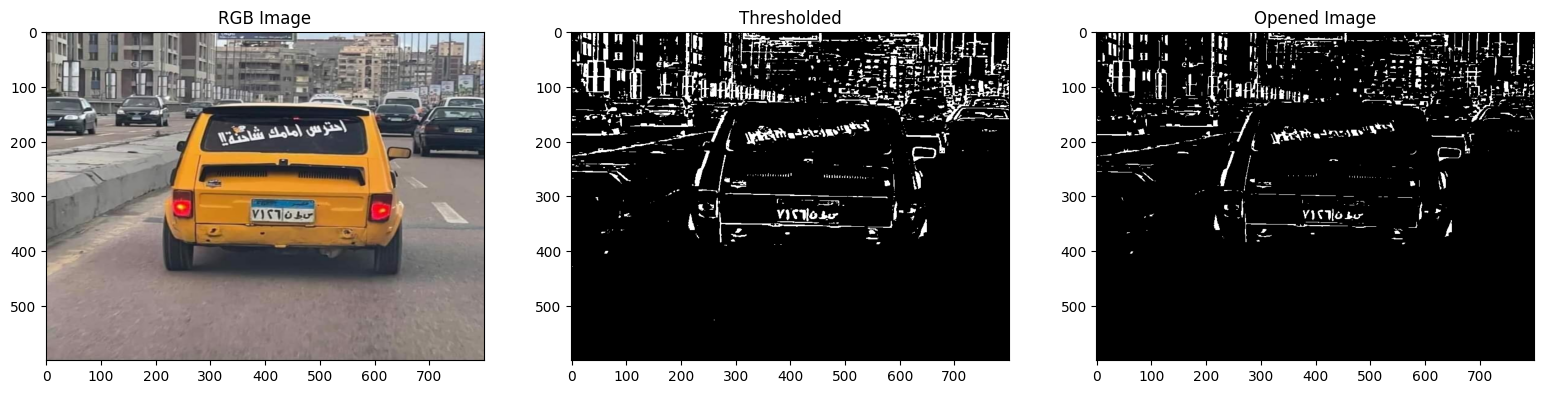

In [49]:
image = io.imread('imgs/0001.jpg')
image = cv2.resize(image,(800,600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
kernel_square = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

bottom_hat = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, kernel_rect) # search for blackhat morphological operation    
_, thresholded = cv2.threshold(bottom_hat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # search for adpative thresholding (otsu's)

erosed_image = cv2.erode(thresholded, kernel_square, iterations=1) 
opened_image = cv2.morphologyEx(erosed_image, cv2.MORPH_OPEN, kernel_rect)
opened_image = cv2.morphologyEx(erosed_image, cv2.MORPH_OPEN, kernel_rect)




show_images([image, thresholded , erosed_image],titles=['RGB Image','Thresholded','Opened Image'])


